<span style="font-family: 'Times New Roman'; font-size: 40px; color: teal;"> Statistics 130 Homework 3 </span> 

ChatGPT Chatlog: https://chatgpt.com/share/66f62cfc-1e78-800f-a268-1af08f9eda9c

1. Use `fig.add_[h/v]line()` and `fig.add_[h/v]rect()` to mark, respspectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of flipper_length_mm for each species onto plotly histograms of flipper_length_mm for each species in the penguins dataset



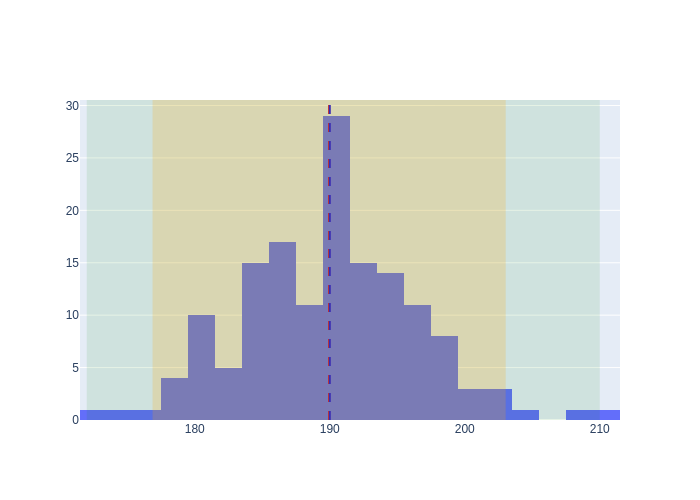

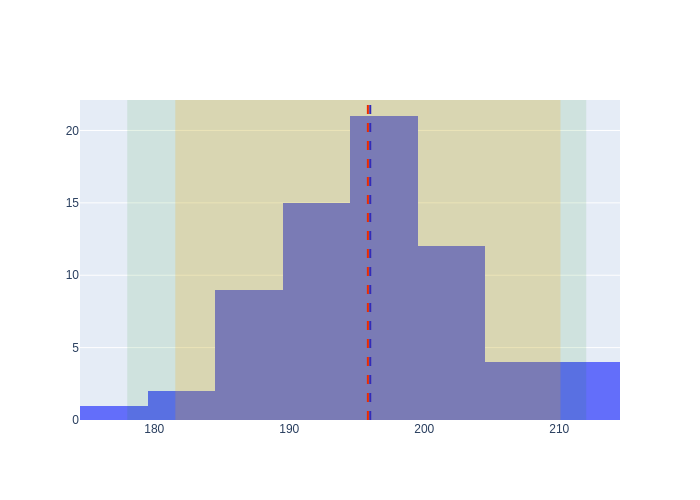

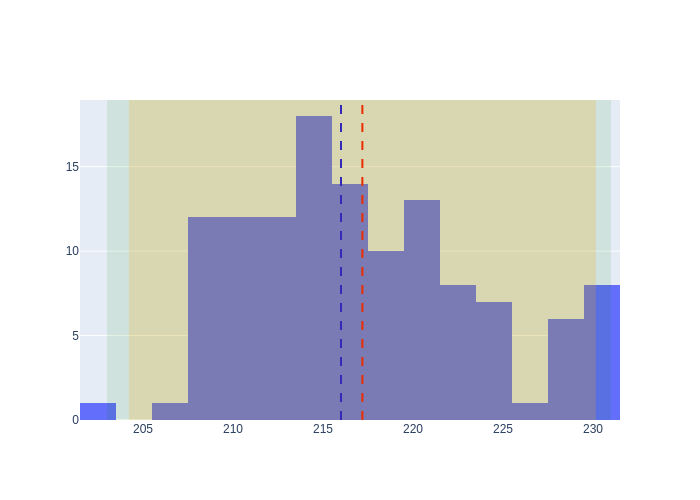

In [9]:
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# For each species, plot the histogram and add statistical measures
for species in penguins['species'].unique():
    species_data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()

    # Calculate statistics
    mean_flipper = species_data.mean()
    median_flipper = species_data.median()
    std_flipper = species_data.std()
    iqr_flipper = species_data.quantile(0.75) - species_data.quantile(0.25)
    min_flipper, max_flipper = species_data.min(), species_data.max()
    
    # Create histogram
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=species_data, name=f'{species} Flipper Length'))
    
    # Add lines for mean and median
    fig.add_vline(x=mean_flipper, line=dict(color='red', dash='dash'), name='Mean')
    fig.add_vline(x=median_flipper, line=dict(color='blue', dash='dash'), name='Median')
    
    # Add rectangles for range, IQR, and 2 standard deviations
    fig.add_vrect(x0=min_flipper, x1=max_flipper, fillcolor="green", opacity=0.1, line_width=0, name='Range')
    fig.add_vrect(x0=mean_flipper - 2 * std_flipper, x1=mean_flipper + 2 * std_flipper, fillcolor="orange", opacity=0.2, line_width=0, name='±2 Std Dev')
    
    # Show figure
    fig.show(renderer="png")

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


2. Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using seaborn kernel density estimation (KDE) plots to produce the desired figures organized in row of three plots

Further Guidance
Time Management Warning: it takes a long time to make a figure, whether you're working with a ChatBot, or building it from scratch based on trial and error changes with your code. ChatBots remove the need to understand the detailed nuances of data visualization library arguments and construction procedures. But after you've passed the 30 minute range of effort working with your ChatBot for this problem to try to get what you want, then your only options are to start a new session and hope for a smoother experience based on improved clarity of your directions, or submit what you have along with a brief note highlighting the duration in your chatlog history where your efforts to make progress did not produce the desired outcome.

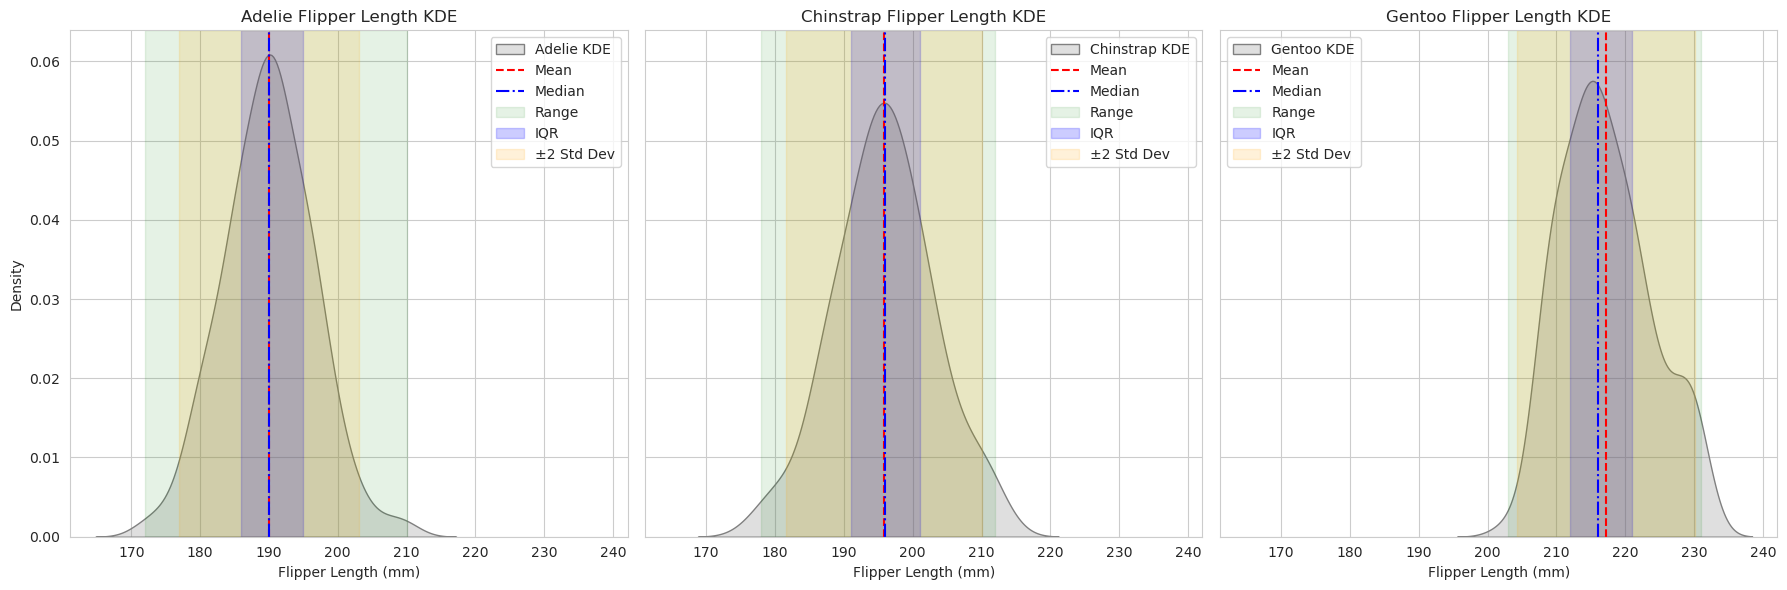

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Prepare the figure and subplots (1 row with 3 plots)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Define colors for the shaded areas
range_color = 'green'
iqr_color = 'blue'
std_color = 'orange'

# Iterate over each species
for i, species in enumerate(penguins['species'].unique()):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()

    # Calculate statistics
    mean_flipper = species_data.mean()
    median_flipper = species_data.median()
    std_flipper = species_data.std()
    min_flipper, max_flipper = species_data.min(), species_data.max()
    q25, q75 = np.percentile(species_data, [25, 75])

    # Plot KDE for each species on its respective axis
    sns.kdeplot(species_data, ax=axes[i], fill=True, color='gray', label=f'{species} KDE')

    # Add vertical lines for mean and median
    axes[i].axvline(mean_flipper, color='red', linestyle='--', label='Mean')
    axes[i].axvline(median_flipper, color='blue', linestyle='-.', label='Median')

    # Shade areas for range, IQR, and 2 std dev
    axes[i].axvspan(min_flipper, max_flipper, color=range_color, alpha=0.1, label='Range')
    axes[i].axvspan(q25, q75, color=iqr_color, alpha=0.2, label='IQR')
    axes[i].axvspan(mean_flipper - 2 * std_flipper, mean_flipper + 2 * std_flipper, color=std_color, alpha=0.15, label='±2 Std Dev')

    # Set title and labels
    axes[i].set_title(f'{species} Flipper Length KDE')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

3. Search online for some images of box plots, histograms, and kernel density estimators (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference

I agree with what the ChatBot said, especially the fact that Kernel Density Estimators (KDE) hinges more on computational calculation to efficiently create the optimal badnwidth. I also concur that Box plots are great for determining outliers and spread of the data which is excellent in comparing distributions for different groups, however it's by nature less detailed than the actualy distribution of data points, which may overlook any important details of the curve. Moreover, histograms and box plots may be more intuitive for people as it doesn't require much understanding of statistics to interpret the two. 

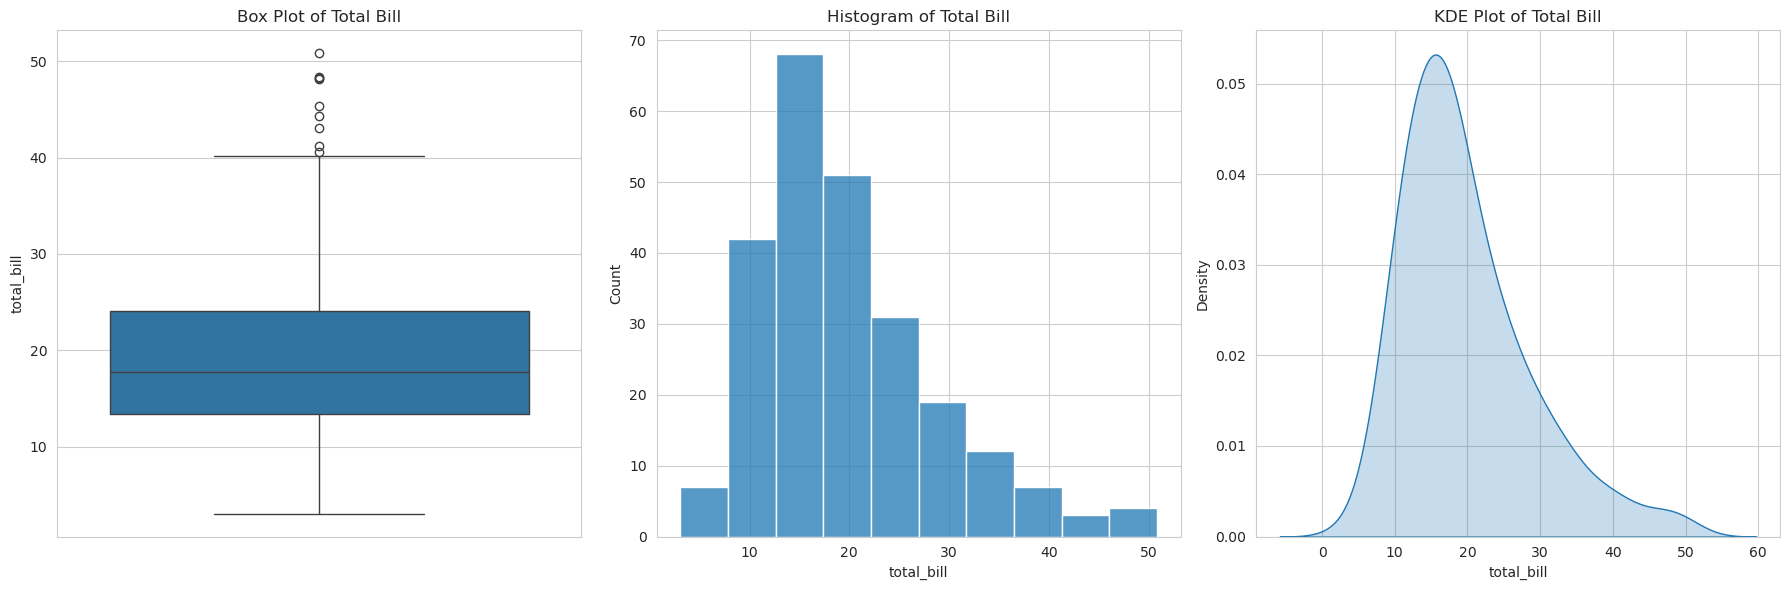

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the "tips" dataset
tips = sns.load_dataset("tips")

# Variable: total_bill
data = tips['total_bill']

# Create subplots for the different visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot
sns.boxplot(data=data, ax=axes[0])
axes[0].set_title('Box Plot of Total Bill')

# Histogram
sns.histplot(data, bins=10, kde=False, ax=axes[1])
axes[1].set_title('Histogram of Total Bill')

# KDE plot
sns.kdeplot(data, ax=axes[2], fill=True)
axes[2].set_title('KDE Plot of Total Bill')

# Show the plots
plt.tight_layout()
plt.show()

4. Run the code below and look at the resulting figure of distributions and then answer the following questions:

- Which datasets have similar means and similar variances 

- Which datasets have similar means but quite different variances  

- Which datasets have similar variances but quite different means  

- Which datasets have quite different means and quite different variances


In [19]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [24]:
import numpy as np
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)  # Uniform distribution
data2 = stats.norm.rvs(5, 1.5, size=n)    # Normal distribution
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]  # Bimodal distribution
data4 = stats.norm.rvs(6, 0.5, size=n)    # Normal distribution

# Calculate variance for each dataset
variance1 = np.var(data1)
variance2 = np.var(data2)
variance3 = np.var(data3)
variance4 = np.var(data4)

# Print the variances
print(f"Variance of Dataset A (Uniform): {variance1:.2f}")
print(f"Variance of Dataset B (Normal): {variance2:.2f}")
print(f"Variance of Dataset C (Bimodal): {variance3:.2f}")
print(f"Variance of Dataset D (Normal): {variance4:.2f}")

# Calculate means for each dataset
mean1 = np.mean(data1)
mean2 = np.mean(data2)
mean3 = np.mean(data3)
mean4 = np.mean(data4)

# Print the means
print(f"Mean of Dataset A (Uniform): {mean1:.2f}")
print(f"Mean of Dataset B (Normal): {mean2:.2f}")
print(f"Mean of Dataset C (Bimodal): {mean3:.2f}")
print(f"Mean of Dataset D (Normal): {mean4:.2f}")

Variance of Dataset A (Uniform): 8.36
Variance of Dataset B (Normal): 2.33
Variance of Dataset C (Bimodal): 9.17
Variance of Dataset D (Normal): 0.23
Mean of Dataset A (Uniform): 5.07
Mean of Dataset B (Normal): 4.93
Mean of Dataset C (Bimodal): 4.99
Mean of Dataset D (Normal): 5.98


*Which datasets have similar means and similar variances*
> B and C have similar means, A and C have similar variance. But there are none that match both of these traits as all values are outside the tolerance of ±1.0.

*Which datasets have similar means but quite different variances*  
> A, B, and C have similar means of approximately 5, but different variance of 8.36, 2.33, and 9.17, respectively within ±0.5 tolerance. 

*Which datasets have similar variances but quite different means*
> None. No dataset have similar variance while also having a largely different mean.

*Which datasets have quite different means and quite different variances*
> D compared to every one else has the most different mean (5.98), and variance (0.23) because the values lie outside of ±0.5 tolerance.


6. Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data

In [27]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [32]:
summary_stats = df[['calories', 'total fat (g)', 'carbohydrates (g)', 'protein (g)', 'sodium (mg)']].describe()
print(summary_stats)

          calories  carbohydrates (g)  protein (g)  sodium (mg)
count   750.000000         750.000000   750.000000    637.00000
mean    296.149333          69.574667    11.398400    361.55416
std     209.034366          65.719590    11.119111    580.64465
min       0.000000           0.000000     0.000000      0.00000
25%     150.000000          30.000000     3.000000      5.00000
50%     260.000000          48.000000     9.000000     80.00000
75%     410.000000          85.750000    16.000000    480.00000
max    1880.000000         340.000000   118.000000   3930.00000


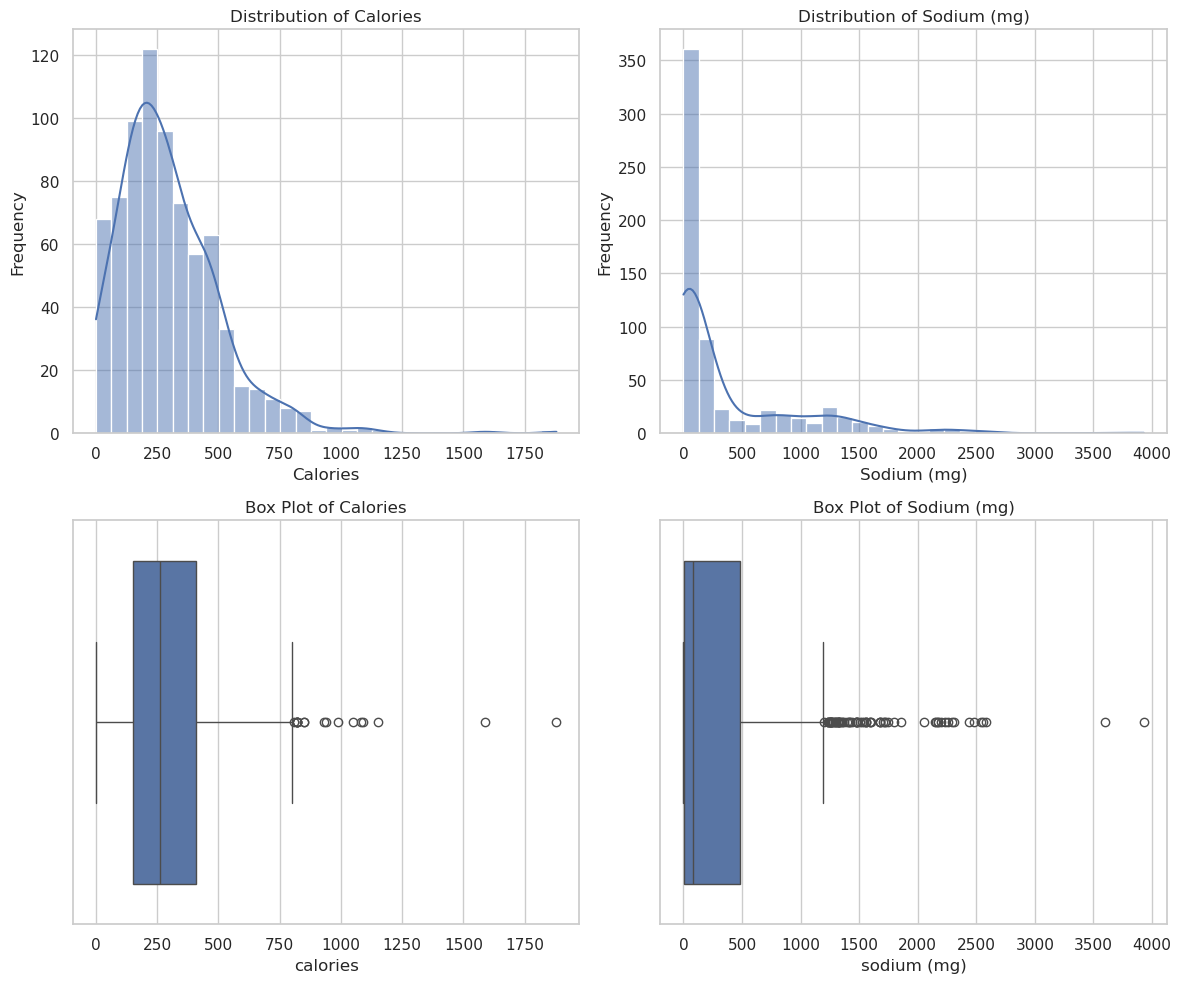

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure for subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram and Boxplot for Calories
sns.histplot(df['calories'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Calories')
axes[0, 0].set_xlabel('Calories')
axes[0, 0].set_ylabel('Frequency')

sns.boxplot(x=df['calories'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Calories')

# Histogram and Boxplot for Sodium
sns.histplot(df['sodium (mg)'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribution of Sodium (mg)')
axes[0, 1].set_xlabel('Sodium (mg)')
axes[0, 1].set_ylabel('Frequency')

sns.boxplot(x=df['sodium (mg)'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Sodium (mg)')

plt.tight_layout()
plt.show()

1. Distribution of Calories:
>Histogram shows a right-skewed distribution, many items have low calories with a few high-calorie items reaching 1880 calorie. In the box plot, there are several high calorie outliers with the middle 50% hosting most of the data swarm between 150 to 410 calories. 

2. Distribution of Sodium (mg):
>The sodium histogram appears right-skewed, meaning that most of the data is low sodium levels with a few reaching as high as 3930 mg. The box plot for sodium indicates several outliers on the high end with central 50% of sodium levels ranging from 5 to 480 mg.


The outliers indicate some of the items are extremely unhealthy, which could potentially pose health risks such as stroke, high blood pressure, osteoporosis, etc.  